
## Group3 BI 4

## 1- Data and Packages Import

#### 1.1-Packages import

In [ ]:
# vector manipulation
import numpy as np
# for data analysis
import pandas as pd
# For dataviz
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import stats Library for statistic test
from scipy.stats import chi2_contingency, f_oneway
!pip install colorama
from colorama import Fore
import scipy.stats as stats
import statsmodels.api as sma

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# machine learning
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
import re
# for comparison
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error

##Churn Telco BI Project

##Context

The leading telecom company has a massive market share but one big problem: several rivals that are constantly trying to steal customers. Because this company has been the market leader for so many years, there are not significant opportunities to grow with new customers.Instead, company executives have decided to focuson their churn: the rate at which they lose customers.

They have two teams especially interested in this data: 

The marketing team and the customer service team. Each team has its own reason for wanting the analysis. 
The marketing team wants to find out who the most likely people to churn are and create content that suits their interests. The customer service team would like to proactively reach out to customers who are about to churn, and try to encourage them to stay.

They decide to hire you for two tasks:

1.Help them identify the types of customers who churn.

2.Predict who of their current customers will churn next month.

To do this, they offer you a file of7,000 customers.Each row is a customer. The Churn column will say Yes if the customer churned in the past month.The data also offers demographic data and data on the services that each customer purchases. Finally there is information on the payments those customers make.

##Deliverables part I
What is expected?

A presentation explaining churn for the marketing team. 
Tell a story to the marketing team to help them understand the customers who churn and what the marketing team can do to prevent it.

Highlight the information with helpful visualizations.

1.How much is churn affecting the business? How big is churn compared to the existingcustomer base?

2.Explain churn by the below categories. Are there any factors that combine to be especially impactful?

a.Customer demographics like age and gender
b.Services used
c.Billing information

3.What services are typically purchased by customers who churned? Are any services especially helpful in retaining customers?

4.How long will it take for the company to lose all its customers? Which demographics will they lose first?

##Deliverables part II

Create analyses that answer the following questions:

1.Are there types of people who churn at higher rates?

Come up with 2-3 profiles to give executives an idea of who churns often. 
Try to look several factors deep for example:
people with no internet service and no phone service,or women who are senior citizens
 See FAQ for details.

2.Do you have any recommendations on how to reach groups of people who churn at high rates?

3.Create a case study for one of your customer profiles.
Show how much additional revenue you could make by increasing sales by 10% in that profile.

4.Use a clustering algorithm like K-Means to break customers into groups.

a.How many groups did you build and how did you decide on that number of groups?

b.How does churn vary by group?

c.How is this similar or different to your analysis without using Machine Learning?


FAQ1.What is a customer profile? It’s a device used to tell a story about customers by providing an example of what a typical customer is. 
A commonly used visualization for a customer profile is a radar chart, but feel free to create your own.


#Connect to data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 1.2- Data Import

In [ ]:
# Load the data provided by Telco
df = pd.read_csv('/content/drive/MyDrive/Churn BI Analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
# Open and explore the data provided by Telco
display(df)
df.info()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#convert TotalCharges type object in float
df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors="coerce") 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print(df.dtypes)
print(df.describe())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.

#### 2- Analysis Information

**Analysis:**

-There are 21 differents columns.

-There are approximately 7043 customers records.

-There are 30 days observed date based on churn columns description.

-The monthly mean charge are about 64$.

-The maximum monthly charge is about 118$.

-The mean of total charge is about 2283$.

-The min and the max of total charge are respectively 18 $ and 8684 $.


#Questions

-What is the exact number of customers who churned last month? percentage ?

-How is the financial values of churned customer? percentage of total values.

####-What is the exact number of customers who churned last month? percentage ?

In [ ]:
#calculate the number of churn customer and the percentage
num_of_yes_churn= df.Churn[df.Churn == 'Yes'].count()
print("Total number of churn customer: ",num_of_yes_churn , "customers")
percentage_churn_yes = round((num_of_yes_churn/df.shape[0])*100,2)
print("Percentage of churn customer: ",'{:,}'.format(percentage_churn_yes), "%") 

Total number of churn customer:  1869 customers
Percentage of churn customer:  26.54 %


#### -How is the financial values of churned customer? percentage of total values.

In [ ]:
# calculate the financial value of churn customer and the percentage
financial_values_of_churn_customer=df[df["Churn"]== "Yes"]["TotalCharges"].sum()
print("The value of financial churn customer: $",'{:,}'.format(financial_values_of_churn_customer))
financial_value_percent_of_churn_customer =round((financial_values_of_churn_customer/df["TotalCharges"].sum())*100,2)
print("Percentage financial values of churned customers: ",'{:,}'.format(financial_value_percent_of_churn_customer), "%")

The value of financial churn customer: $ 2,862,926.9
Percentage financial values of churned customers:  17.83 %


-How many customers Telco loses per day?

In [ ]:
# number of customers lost per day
Telco_customer_losses_per_day=round(num_of_yes_churn/30,1)
Telco_customer_losses_per_day
print("Every day Telco loses: ",'{:,}'.format(Telco_customer_losses_per_day), "customers") 

Every day Telco loses:  62.3 customers


Analysis:

-There are 26,54% of customers who churn their contract.

The financial amount losses due by to theirs resignation is more than 2.8 millions dollars by month. 

The losses rate it is higher that Telcom losts 62 customers per day. 

###Find unique values

#### 2.1- Values Formating

In [ ]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
#Describe numerical values
df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,5174-RNGBH,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [ ]:
#create categorical list
liste_cat =['gender','SeniorCitizen','Partner','Dependents','PhoneService',
            'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
            'PaperlessBilling','PaymentMethod']

In [ ]:
#transform the type of the list to category
liste_cat1 = df[liste_cat].astype('category')

In [ ]:
#Transform dataframe by dummies
liste_cat_dum = pd.get_dummies(liste_cat1)

In [ ]:
liste_cat_dum.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
2,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0
4,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
print(liste_cat_dum.shape)
print(liste_cat_dum.columns)

(7043, 40)
Index(['gender_Female', 'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',

## Final Data

In [ ]:
#create numerical dataframe
numerical_data = df.loc[:,['tenure','MonthlyCharges','TotalCharges']]
numerical_data.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [ ]:
#create variable target
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)
target = df['Churn']
target.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
#concatener cat_data & num_data and specified target columns
x = pd.concat([liste_cat_dum,numerical_data], axis=1)
y= target
print(x)
print(y)

      gender_Female  gender_Male  ...  MonthlyCharges  TotalCharges
0                 1            0  ...           29.85         29.85
1                 0            1  ...           56.95       1889.50
2                 0            1  ...           53.85        108.15
3                 0            1  ...           42.30       1840.75
4                 1            0  ...           70.70        151.65
...             ...          ...  ...             ...           ...
7038              0            1  ...           84.80       1990.50
7039              1            0  ...          103.20       7362.90
7040              1            0  ...           29.60        346.45
7041              0            1  ...           74.40        306.60
7042              0            1  ...          105.65       6844.50

[7043 rows x 43 columns]
0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


#### 2.2- Dummies generated

In [ ]:
df_dummies=pd.concat([x,y],axis=1)
df_dummies

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,29.85,29.85,0
1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,34,56.95,1889.50,0
2,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,2,53.85,108.15,1
3,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,45,42.30,1840.75,0
4,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,24,84.80,1990.50,0
7039,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,72,103.20,7362.90,0
7040,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,11,29.60,346.45,0
7041,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,4,74.40,306.60,1


In [ ]:
#Count non senior citizen
df_dummies[df_dummies['SeniorCitizen_0']== 1].count()

gender_Female                              5901
gender_Male                                5901
SeniorCitizen_0                            5901
SeniorCitizen_1                            5901
Partner_No                                 5901
Partner_Yes                                5901
Dependents_No                              5901
Dependents_Yes                             5901
PhoneService_No                            5901
PhoneService_Yes                           5901
MultipleLines_No                           5901
MultipleLines_No phone service             5901
MultipleLines_Yes                          5901
InternetService_DSL                        5901
InternetService_Fiber optic                5901
InternetService_No                         5901
OnlineSecurity_No                          5901
OnlineSecurity_No internet service         5901
OnlineSecurity_Yes                         5901
OnlineBackup_No                            5901
OnlineBackup_No internet service        

###Hypothesis Test
The contingency tables between Fraud and other Categorical variables

+

Chi-Square test (A Chi-Square test is determined by a significant difference or relationship between two categorical variables from a single population. In general, this test assesses whether distributions of categorical variables differ from each other).

The contingency table between Churn and Gender

+ Chi-Square test


Null Hypothesis H0: The two categorical variables are independent—that is, Churn is independent with gender.

Alternative Hypothesis Ha : The two categorical variables are not independent—that is, churn is not independent with gender.

In [ ]:
#create index 
df["index"]=df.index

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,index
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,4


In [ ]:
# Summarise dataframe using pivot table: Churn & Gender
churn_and_gender_pivot=pd.pivot_table(df,values="index", index=['Churn'],columns=['gender'], aggfunc="count",fill_value =0)

In [ ]:
churn_and_gender_pivot

gender,Female,Male
Churn,,
0,2549,2625
1,939,930


In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(churn_and_gender_pivot.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 0.48657873605618596
Hypothesis Accepted


In [ ]:
# Summarise dataframe using pivot table: Churn & SeniorCitizen
churn_and_SeniorCitizen_pivot=pd.pivot_table(df,values="index", index=['Churn'],columns=['SeniorCitizen'], aggfunc="count",fill_value =0)

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(churn_and_SeniorCitizen_pivot.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 1.510066805092378e-36
Hypothesis Rejected


In [ ]:
# Summarise dataframe using pivot table: Churn & Dependents
churn_and_Dependents_pivot=pd.pivot_table(df,values="index", index=['Churn'],columns=['Dependents'], aggfunc="count",fill_value =0)

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(churn_and_Dependents_pivot.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 4.9249216612154196e-43
Hypothesis Rejected


In [ ]:
# Summarise dataframe using pivot table: Churn & Contract
churn_and_Contract_pivot=pd.pivot_table(df,values="index", index=['Churn'],columns=['Contract'], aggfunc="count",fill_value =0)

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(churn_and_Contract_pivot.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 5.863038300673391e-258
Hypothesis Rejected


In [ ]:
# Summarise dataframe using pivot table: Churn & PaymentMethod
churn_and_PaymentMethod_pivot=pd.pivot_table(df,values="index", index=['Churn'],columns=['PaymentMethod'], aggfunc="count",fill_value =0)

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(churn_and_PaymentMethod_pivot.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 3.6823546520097993e-140
Hypothesis Rejected


In [ ]:
# Summarise dataframe using pivot table: Churn & PaperlessBilling
churn_and_PaperlessBilling_pivot=pd.pivot_table(df,values="index", index=['Churn'],columns=['PaperlessBilling'], aggfunc="count",fill_value =0)

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(churn_and_PaperlessBilling_pivot.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 4.073354668665985e-58
Hypothesis Rejected


###Anova Test
Null Hypothesis H0: There is no difference between the mean performance
score of multiple locations.

Alternative Hypothesis Ha: There is a difference between the mean
performance score of multiple locations.

In [ ]:
stat, p = f_oneway(df.Churn, df.MonthlyCharges, df.TotalCharges)
print("p-values:", p)
print("ANOVA:", stat)
if p < 0.05:
  print("Hypothesis Rejected")
else:
  print("Hypothesis Accepted")

p-values: nan
ANOVA: nan
Hypothesis Accepted


###Deliverables part I

###Questions

1.How much is churn affecting the business? How big is churn compared to the existing customer base?

2.Explain churn by the below categories. Are there any factors that combine to be especially impactful?

a.Customer demographics like age and gender

b.Services used 

c.Billing information


3.What services are typically purchased by customers who churned? Are any services especially helpful in retaining customers?

4.How long will it take for the company to lose all its customers? Which demographics will they lose first?

###The distribution and graphics of categorical columns are as follows:

In [ ]:
df.customerID.value_counts().to_frame()

,customerID
5174-RNGBH,1
8079-XRJRS,1
4003-OCTMP,1
5642-MHDQT,1
2108-XWMPY,1
...,...
0139-IVFJG,1
2346-CZYIL,1
2001-MCUUW,1
8659-HDIYE,1


## 4- Final Visualization and Exploratory

In [ ]:
#create function able to plot and calculate descriptive analysis for categorical columns 
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}), 
          end='\n\n\n')

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title(col_name)
        plt.xticks(rotation = 45)
        plt.show()


## 4.1 let's see the analysis for each categorical columns

In [ ]:
cat_cols=['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

        gender     Ratio
Male      3555  50.47565
Female    3488  49.52435




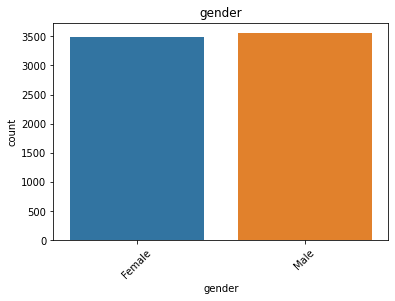

   SeniorCitizen      Ratio
0           5901  83.785319
1           1142  16.214681




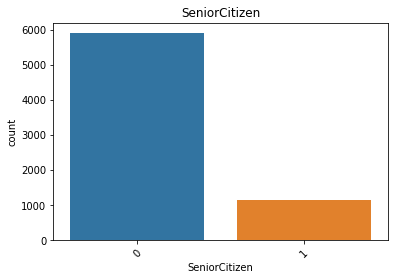

     Partner     Ratio
No      3641  51.69672
Yes     3402  48.30328




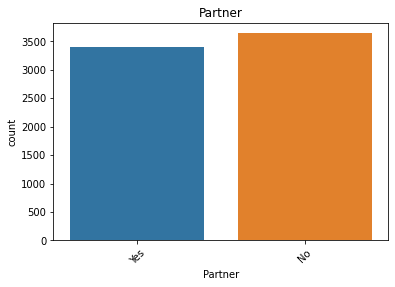

     Dependents      Ratio
No         4933  70.041176
Yes        2110  29.958824




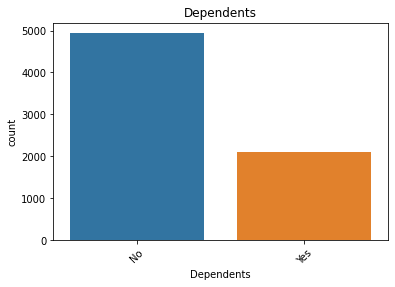

     PhoneService      Ratio
Yes          6361  90.316626
No            682   9.683374




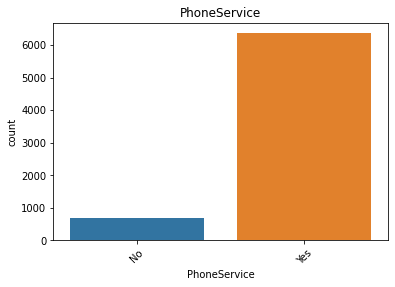

                  MultipleLines      Ratio
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374




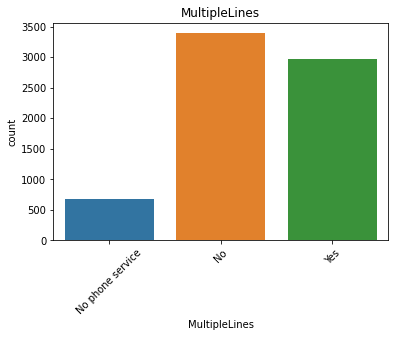

             InternetService      Ratio
Fiber optic             3096  43.958540
DSL                     2421  34.374556
No                      1526  21.666903




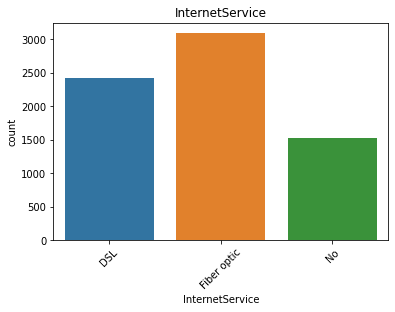

                     OnlineSecurity      Ratio
No                             3498  49.666335
Yes                            2019  28.666761
No internet service            1526  21.666903




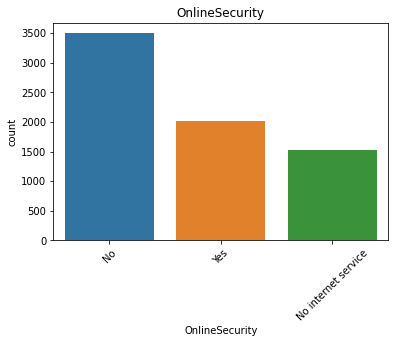

                     OnlineBackup      Ratio
No                           3088  43.844952
Yes                          2429  34.488144
No internet service          1526  21.666903




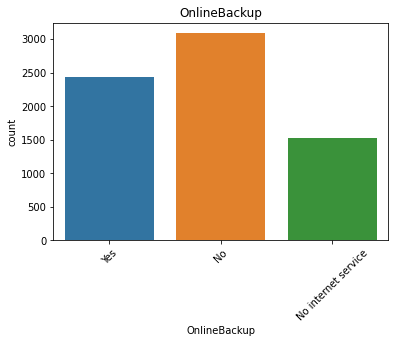

                     DeviceProtection      Ratio
No                               3095  43.944342
Yes                              2422  34.388755
No internet service              1526  21.666903




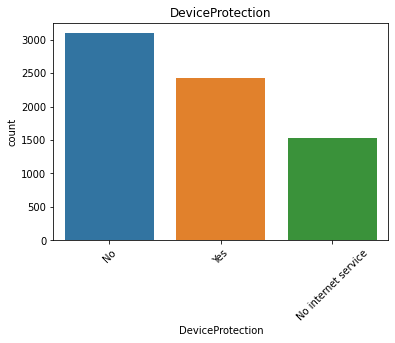

                     TechSupport      Ratio
No                          3473  49.311373
Yes                         2044  29.021724
No internet service         1526  21.666903




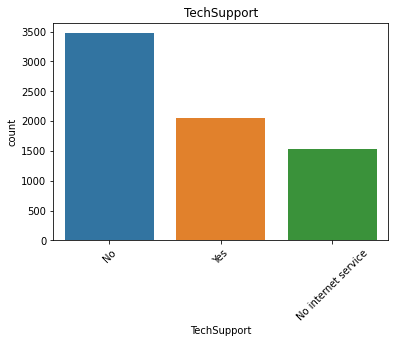

                     StreamingTV      Ratio
No                          2810  39.897771
Yes                         2707  38.435326
No internet service         1526  21.666903




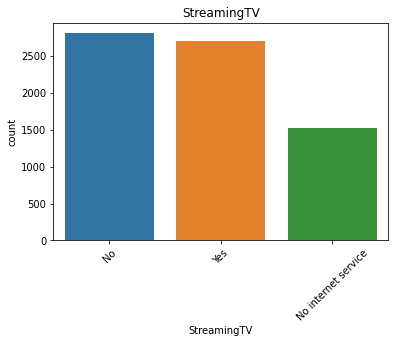

                     StreamingMovies      Ratio
No                              2785  39.542808
Yes                             2732  38.790288
No internet service             1526  21.666903




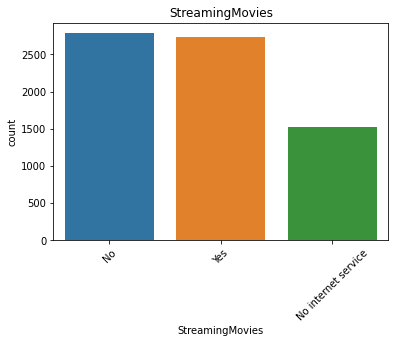

                Contract      Ratio
Month-to-month      3875  55.019168
Two year            1695  24.066449
One year            1473  20.914383




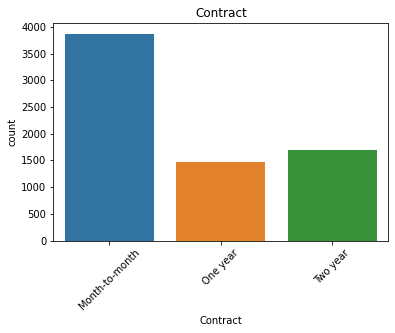

     PaperlessBilling      Ratio
Yes              4171  59.221922
No               2872  40.778078




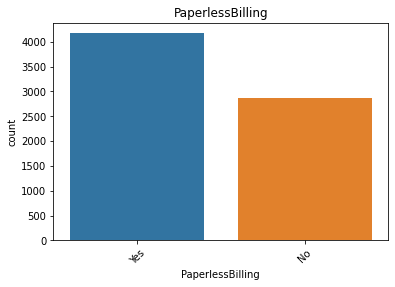

                           PaymentMethod      Ratio
Electronic check                    2365  33.579441
Mailed check                        1612  22.887974
Bank transfer (automatic)           1544  21.922476
Credit card (automatic)             1522  21.610109




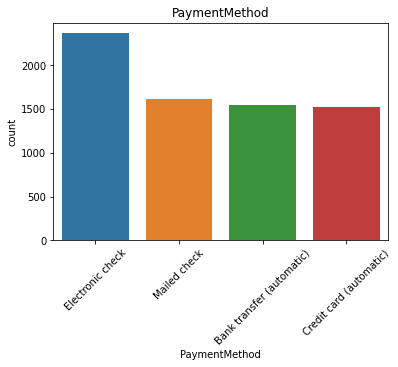

   Churn      Ratio
0   5174  73.463013
1   1869  26.536987




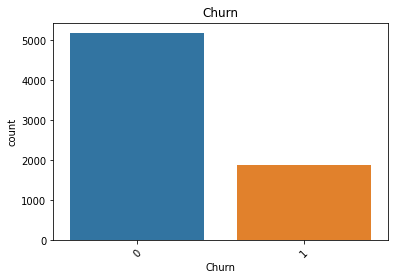

In [ ]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

## 5-Statistical description about customers,services and accountant information.

###Analysis:

We observe in the dataset we can see:

-half male and half female.

-only 16,87% of customers are citizen.

-51% of customers don't have partner.

-70% of customers is not dependents.

-90% of customers have phone services.

-42% of customers have more than one phone.

-21% of customers don't have internet services.

-49% of customers don't have online security services.

-43% of them don't have OnlineBackup.

-43% don't have DeviceProtection.

-49% don't have Tech Support.

-55% of customer have a month-to-month contract.

-33% of them use electronic check.


## Questions

###1.How much is churn affecting the business?

As we have calculated the amount of customers who cancelled their contracts and their percentage values before: we can say that: 1869 customers or 26.54% of Telcom's customer base cancelled their contracts the previous month.


### How big is churn compared to the existing customer base?


We have calculated above that customer losses cost Telco approximately $2,862,926.9 or 17.83% of their total revenue.


In [ ]:
#total revenue
total_revenue=df["TotalCharges"].sum()
print('total_revenue',"$", total_revenue)
print('financial_values_of_churn_customer',"$", financial_values_of_churn_customer)

total_revenue $ 16056168.7
financial_values_of_churn_customer $ 2862926.9


In [ ]:
financial_report = [['total_revenue', total_revenue], ['financial_values_of_churn_customer', financial_values_of_churn_customer]]
df1 = pd.DataFrame(financial_report, columns = ['index', 'financial_values'])
df1

,index,financial_values
0,total_revenue,16056168.7
1,financial_values_of_churn_customer,2862926.9


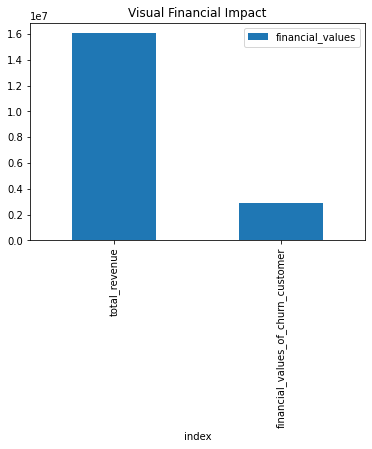

In [ ]:
# a simple line plot
df1.plot(kind='bar',title="Visual Financial Impact",x='index',y='financial_values')

###2.Explain churn by the below categories. Are there any factors that combine to be especially impactful?

###a.Customer demographics like age and gender

###b.Services used

###c.Billing information

### Correlation features goal (Churn)

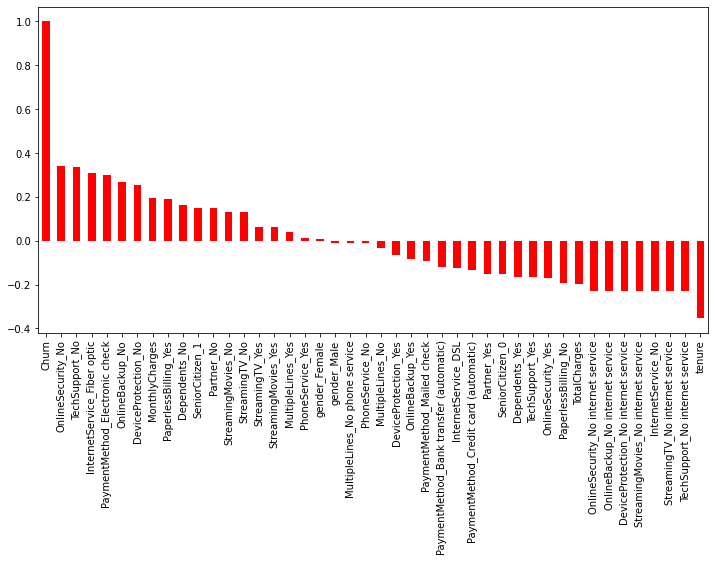

In [ ]:
#Data correlation between target variable and features.
plt.figure(figsize=(12,6))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', cmap="autumn")

###Analysis:

We can see that none of the columns can explain more than 40% of the reason for this level of contract resignation.


The categories most likely to cancel contracts are those with the following characteristics:
- No online security service.
-No technical support.
-They have fiber optics.
-They pay by electronic check.
-They don't have online data backup service.
-They are often senior citizens.



We also find that gender is indifferent to the decision to break a contract. 



We can also see that the groups least likely to break a contract have the following characteristics:

-They are the oldest subscribers.

-They have technical support.

-They have a data protection department.

-They have a partner.

-They pay by credit card and/or automatic bank transfer.





###Explanation.

We can assume that customers who terminate their contracts do so out of dissatisfaction.

-Dissatisfaction with their fiber optic services.

-Difficulty/loss or theft in their electronic payments.

-Too high a payment burden.

We can also consider that those who stay are those who are more satisfied with their services.

In order to be sure, a satisfaction survey should be conducted.


Text(0.5, 1.0, 'Correlation HeatMap')

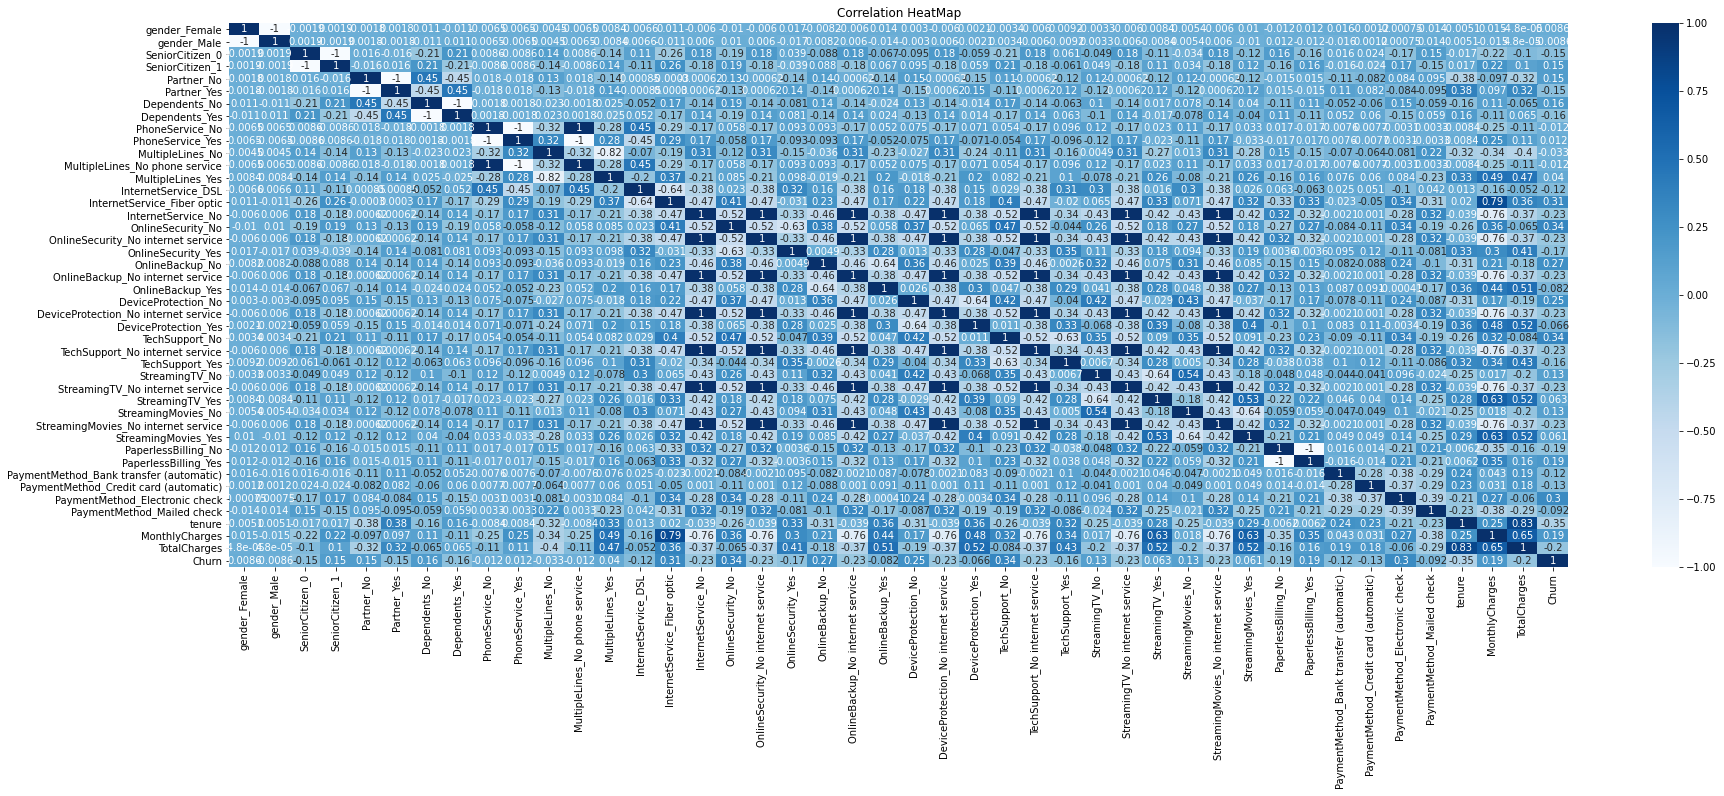

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(df_dummies.corr(), annot=True, cmap='Blues')
plt.title('Correlation HeatMap')

###3.What services are typically purchased by customers who churned? Are any services especially helpful in retaining customers?

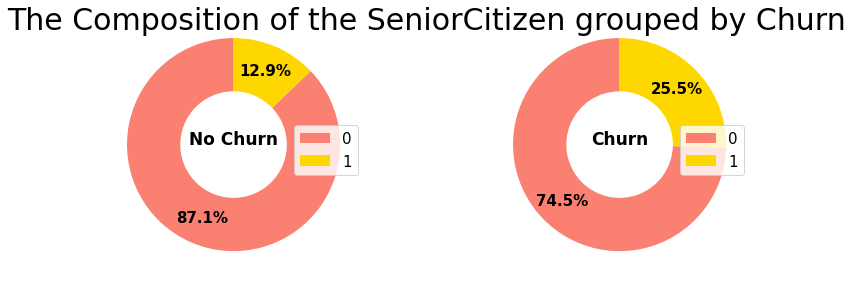

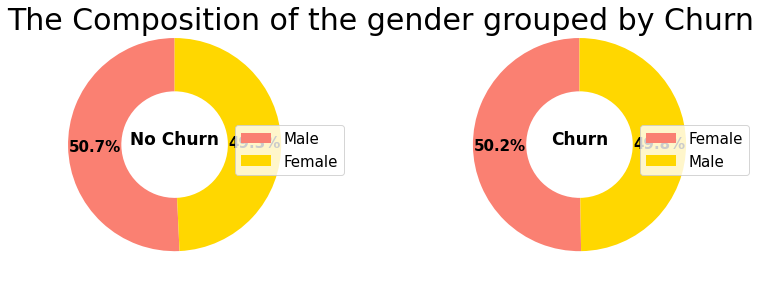

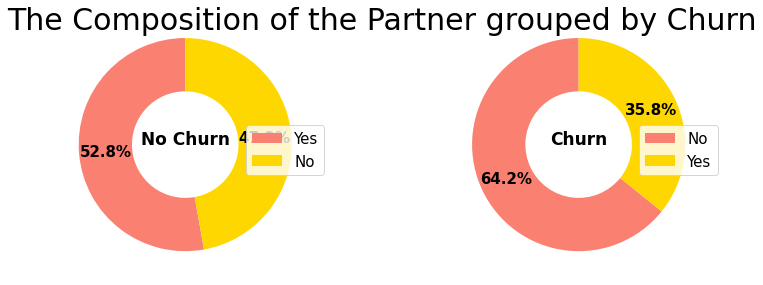

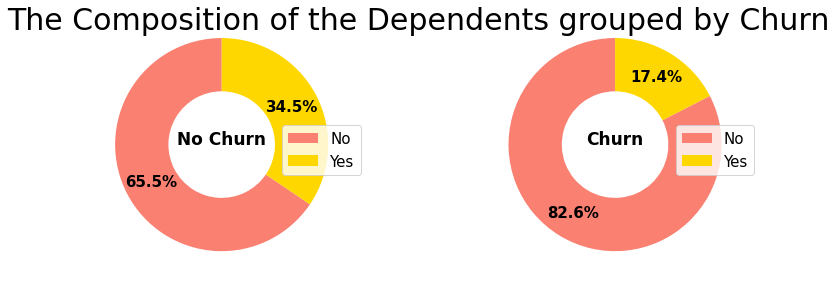

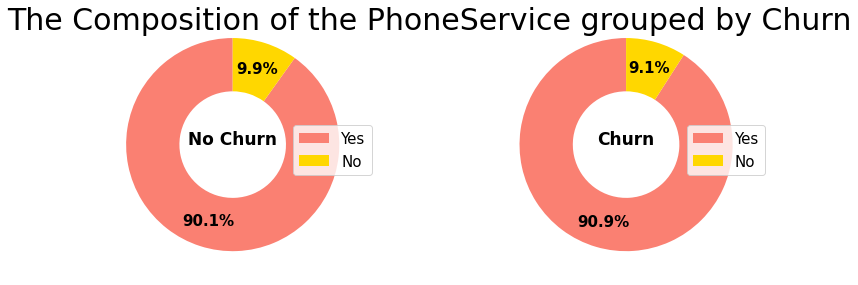

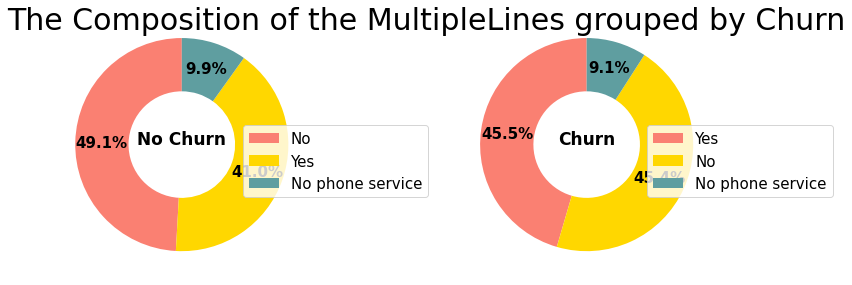

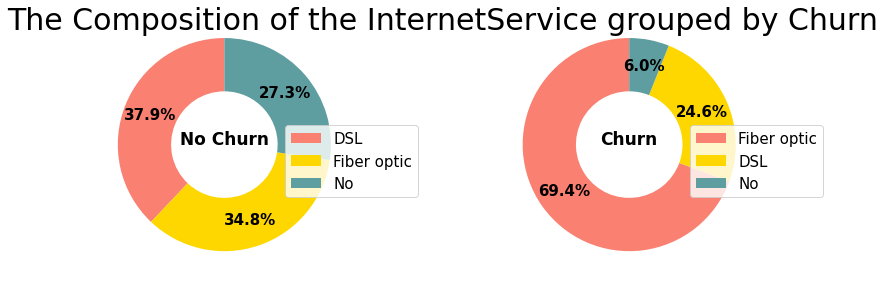

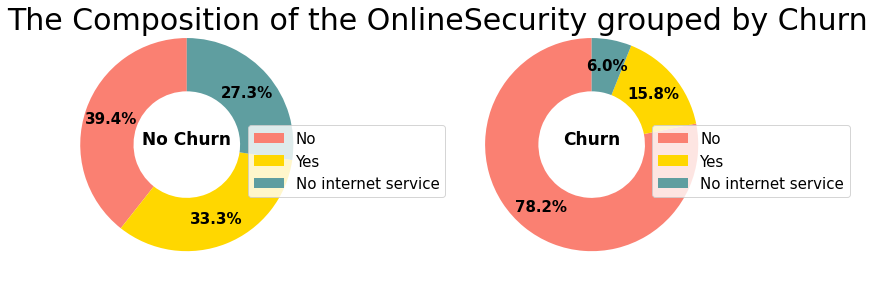

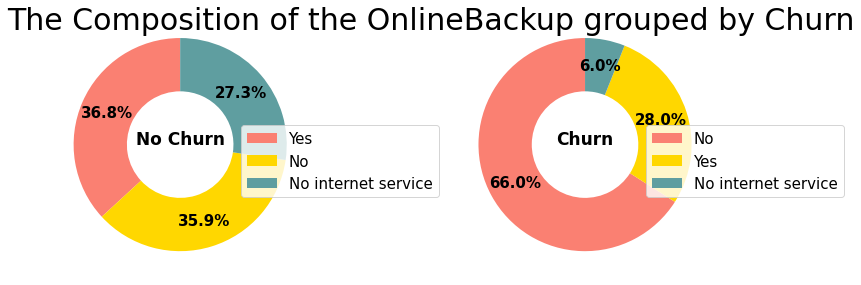

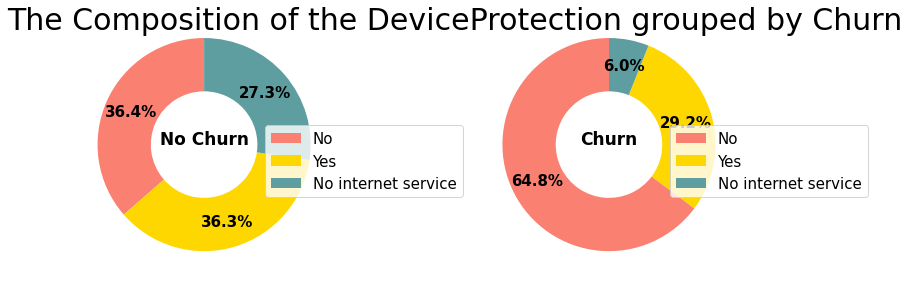

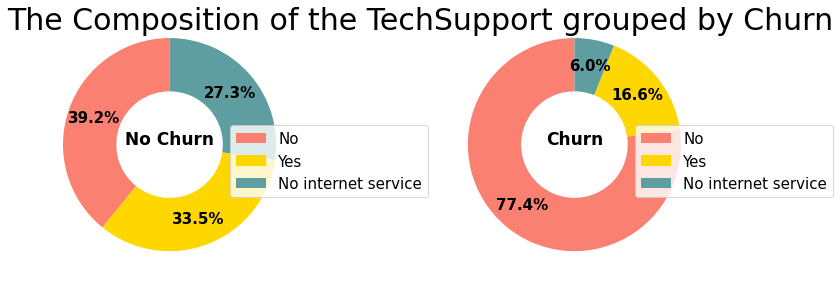

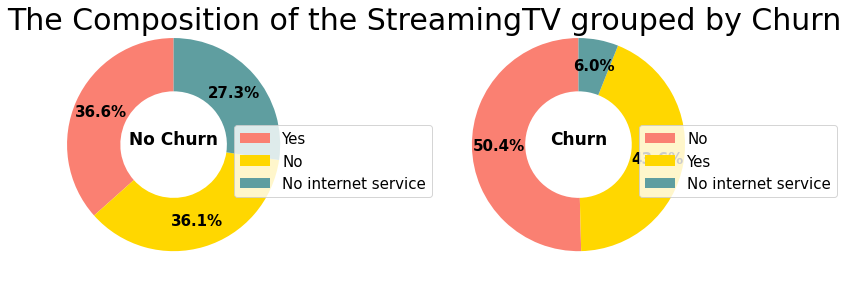

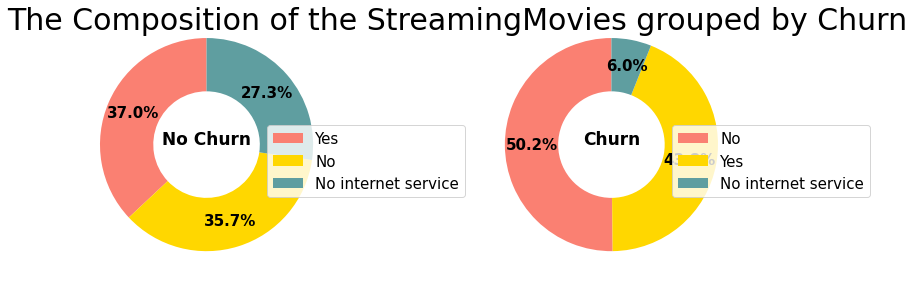

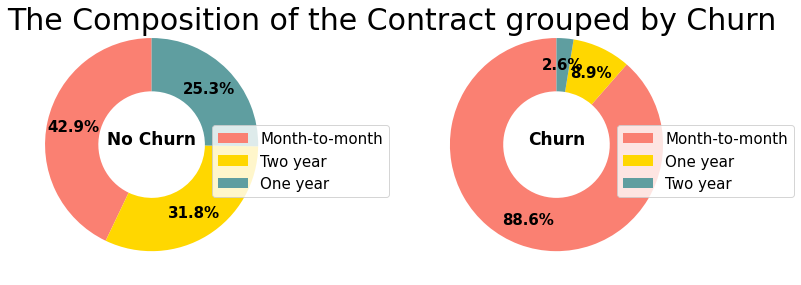

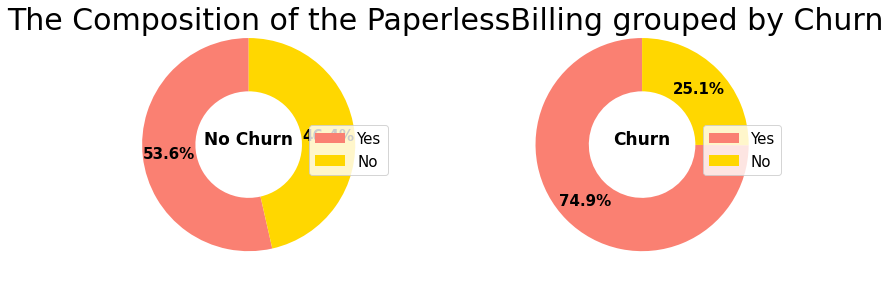

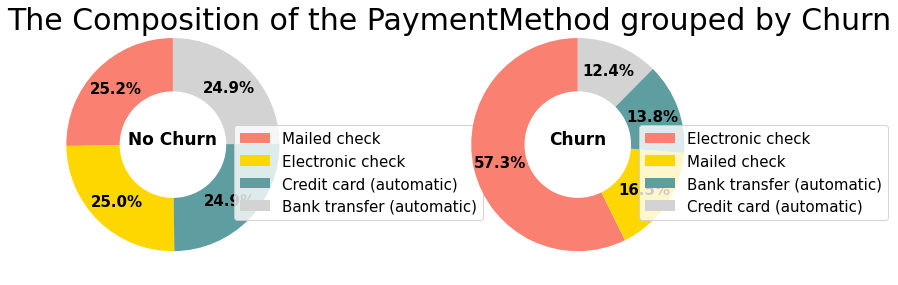

In [ ]:
#Distribution of categorical features by Churn
def Chart(col_name):
    def df1(col_name, churn_YoN):
        df1 = df[df["Churn"]==churn_YoN][col_name].value_counts().to_frame().reset_index()
        return df1

    fig, ax = plt.subplots(1,2, figsize=(12,4))
    dict = {"width": 0.5}

    ax[0].pie(df1(col_name, 0)[col_name], 
            colors = ["Salmon", "Gold", "#5F9EA0", "#D3D3D3"], 
            autopct='%1.1f%%', startangle = 90, 
            pctdistance = 0.75,
            wedgeprops=dict,
            textprops={'fontsize': 15, 'weight' : 'heavy'})

    ax[1].pie(df1(col_name, 1)[col_name], 
            colors = ["Salmon", "Gold", "#5F9EA0", "#D3D3D3"], 
            autopct='%1.1f%%', startangle = 90, 
            pctdistance = 0.75,
            wedgeprops=dict,
            textprops={'fontsize': 15, 'weight' : 'heavy'})

    ax[0].text(0, 0, 'No Churn', ha="center", fontsize = 17, weight="bold")
    ax[1].text(0, 0, 'Churn', ha="center", fontsize = 17, weight="bold")
    for i in range(2):
        ax[i].legend(loc='upper left', fontsize=15, bbox_to_anchor=(0.7, 0.6), labels = df1(col_name,i)["index"])

    plt.suptitle("The Composition of the {} grouped by Churn".format(col_name), fontsize = 30)
    fig.tight_layout()
    plt.show()

col = ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for i in col:
    Chart(i)

###Analysis:
The above graphs allow us to clearly identify which service customers are most likely to churn and which are least likely to churn.

Services with the highest churn rate:

-88.6% of churners have a month-to-month contract.

-57.3% of churners pay by Electronic Check.

-50% of churners do not have a streaming movie service.

-77.4% of churners do not have technical support.

-64.8% of them don't have a hardware protection service.

-66% of churners don't have an online storage service.

-78.2% of churns don't have an online protection service.

-69.4% of them have an optical fiber service.

-82.6% of churns are non-dependent.

-64.2% of churns have no partners.







###4.How long will it take for the company to lose all its customers? Which demographics will they lose first?

In [ ]:
# Time projection for total customers losses.
print(f"Telco will lose all of its {df.customerID.shape[0]} clients in around {round((df.customerID.shape[0]/Telco_customer_losses_per_day)/30)} months with the lost of {Telco_customer_losses_per_day} customers per day.")

Telco will lose all of its 7043 clients in around 4 months with the lost of 62.3 customers per day.


###Which demographics will they lose first?

Based on our correlation graph previously made, we could identify that the groups with the following characteristics:

-They are not dependent.

-They don't have partners.

-Senior citizen.


###DISCUSSION

Aligning all that with the above analysis, we can draw some conclusion here for all 2 groups:

###THE LEAVING CUSTOMERS (Churn = Yes or 1)

26.6% of the clients in this sample cancelled their contracts in the last month. Most of them have no partner or dependents. They use the fiber optic internet service and do not subscribe to any other additional services except for streaming movies or TV.

Most of them sign a monthly contract and leave as soon as it expires. They support paperless billing and electronic payment, and their bills are generally higher than other customers.

Group Characteristics:

A- Customer demographic information:

26% are seniors.
They are 50% male and 50% female. 64% do not have a partner.
83% have no dependents.

B- Services:

-70% of them use fiber optics, and only 6% of them do not subscribe to internet service.

-65-80% of them do not use additional Internet services such as OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport.

-50% of them do not use movies or streaming TV while 40% of them do.

C- Customer Account Information:

-89% of customers sign a month-to-month contract.

-75% adopt paperless billing.

-57% use electronic payment methods.

Most of them leave after only one month. 60% of their monthly charges are above average.

The maximum total charge is $8685, but 47% are concentrated in the $0-100 range.

CUSTOMERS WHO STAY (Churn = No):
73.4% of customers in this sample stayed in the past month.

Group Characteristics:

A- Customer demographics:

13% are seniors.

51% male and 50% female.

47% do not have a partner.

66% have no dependents.

B- Services:

38% of them use DSL internet.

The number of people choosing all three options is evenly distributed (Fiber optic 35%, No 27%).

About (36-40%) do not use additional internet services. There is also an equal percentage (36-40%) not using additional internet services.

C- Customer Account Information:

43% of customers sign a month-to-month contract/ 32% a two-year contract/ 25% a one-year contract.

54% adopt paperless billing.

The proportion of users of the four payment methods is the same (Electronic check/ Bank transfer (automatic)/ Credit card (automatic)/ Postal check), i.e. about 25%.


Most do not spend much, monthly fees are concentrated at $20. (Range: $18-120).




##Recommandations

Development of new services:

1-Since we found that an 89% of churn had only monthly contracts, marketing can develop more affordable, longer-term loyalty plans.

2-Senior citizens have high monthly service charges even though they do not subscribe to most services.
We can offer all-inclusive packages with higher added value. 

Marketing 

contract termination does not seem to be gender-based in any way.
We have found that people who have no one to depend on them and no partner often tend to subscribe only to the bare minimum.
It might be necessary to develop special service packages adapted to their needs.

Hence the need for Telco to conduct a survey.

The survey will identify sources of customer dissatisfaction, or other hidden characteristics of consumers.



###Deliverables part II

This part is for the week 2.